## Linear Regression
>                                                                       Authored by Karan R Nadagoudar

**Linear Regression** is a statistical way of finding <u>relationship</u> between dependent and independent variable.<br>
This method is used to predict outcome (dependent variable) from independent/predictor variable. It is called Linear Regression because it deals with linear data which means dependent variable varies linearly when compared to independent variable. <br>
> _For example_ : Salary(lakhs/annum) = 3 + Experience(years) * 1.5 <br>
   The above example depicts the relationship betweeen Salary (dependent variable) and Experience (independent variable).
Salary changes linearly with Experience which shows the corelation between the dependent and independent variable

<br>
There are few assumptions that linear regression line data should statisfy:
 - <u>Linearity</u>
     - The relationship between dependent and independent variable should linear
 - [Homoscedasticity](http://www.statsmakemecry.com/smmctheblog/confusing-stats-terms-explained-heteroscedasticity-heteroske.html)
     - It refers to the circumstance in which the variability of a variable is unequal across the range of values of a second variable that predicts it.
 - <u>Normality of error distribution</u>
     - Distribution of differences between Actual & Predicted values (Residuals) should be [normally distributed](https://www.coursera.org/learn/machine-learning/lecture/ZYAyC/gaussian-distribution).
 - <u>Statistical independence of errors</u>
     - The error terms (residuals) should not have any correlation among themselves. The consecutive error terms (residuals) should be independent of each other.

<br>
***
A simple linear regression using scikit-learn library and python by considering a sample dataset comprising of experience and salary records (randomly generated).

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression   #Linear models ( Regression )
from sklearn.cross_validation import train_test_split #module to split dataset
import matplotlib.pyplot as plt

Importing a sample dataset using pandas.

In [2]:
dataset = pd.read_csv('salary.csv')
print("Rows:",dataset.shape[0],"Columns:",dataset.shape[0])

Rows: 14 Columns: 14


In [3]:
#separating out independent variable
X=dataset.iloc[:,:-1].values
Y=dataset.iloc[:,1].values

Visualising dataset using matplotlib

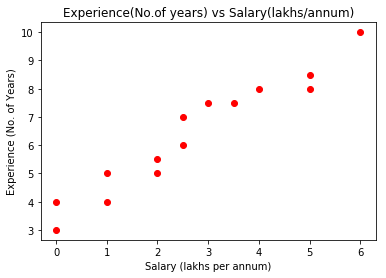

In [4]:
plt.plot(X,Y,'ro')
plt.title("Experience(No.of years) vs Salary(lakhs/annum)")
plt.xlabel("Salary (lakhs per annum)")
plt.ylabel("Experience (No. of Years)")
plt.show()

Every dataset should be divided into training and testing dataset. Training data set is used to train your model whereas testing dataset is used test and confirm the performance of the model.<br>
Best ratio of splitting training and testing data is **80:20** or **70:30**
We will be using scikit-learn module train_test_split from cross validation to split our dataset accordingly.
We use random state for random sampling.

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 39)
print("test X:\n", X_test, "\ntest Y:\n", Y_test)
print("\ntrain X:\n", X_test, "\ntrain Y:", Y_train)

test X:
 [[ 1.]
 [ 2.]
 [ 0.]] 
test Y:
 [ 4.   5.5  4. ]

train X:
 [[ 1.]
 [ 2.]
 [ 0.]] 
train Y: [  7.5   8.5   8.    7.    5.    6.    5.    3.    8.   10.    7.5]


Defining Linear regressor from sklearn linear_model and train it by fitting training dataset to it

In [6]:
regressor = LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Our linear regression model named regressor is trained with training dataset.<br>
Let's visualize the linear regression line in comparison with training dataset

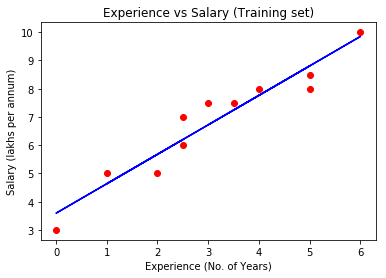

In [7]:
#Visualisong data for training set
plt.plot(X_train,Y_train,'ro')
plt.plot(X_train,regressor.predict(X_train),'b')
plt.title("Experience vs Salary (Training set)")
plt.xlabel("Experience (No. of Years)")
plt.ylabel("Salary (lakhs per annum)")
plt.show()

Now let's visualize regressor line with test dataset

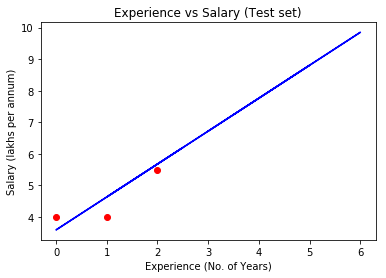

In [8]:
#Visualisong data for test set
plt.plot(X_test,Y_test,'ro')
plt.plot(X_train,regressor.predict(X_train),'b')
plt.title("Experience vs Salary (Test set)")
plt.xlabel("Experience (No. of Years)")
plt.ylabel("Salary (lakhs per annum)")
plt.show()

<br>Since the model is trained, we can use it to predict results for us

In [9]:
predSalary = regressor.predict(8) #predict salary for experience of 8 years
print("For experience of 8 years: ""%.2f" %predSalary,"lakhs per annum")

For experience of 8 years: 11.94 lakhs per annum


We have metrics to check the model performance on how well it can predict values:
 - R – Square ($R^2$)
     $R^2$ = $(TSS - RSS)/TSS$ <br>
     where TSS: Total sum of squares and RSS: residual sum of squares, it will be translated as below <br>
     $R^2 = 1 - (\sum_{i}{(Yactual_i - Ypred_i)}^2/\sum_{i}{(Yactual_i - Ymean)}^2)$<br>
<br> 
 - Mean Absolute Percentage Error (MAPE)<br>
     $MAPE = \sqrt(\sum_{i}{(Yactual_i - Ypred_i)}^2/N)$<br>
     N is total number of records

Let's check model performance using MAPE

In [10]:
from math import sqrt
predY = regressor.predict(X_test)
diff = []
for i in range(len(X_test)):
    diff.append((Y_test[i] - predY[i])**2)
print(sqrt(sum(diff)/len(X_test))*100,"%")

44.778690479553305 %


We can observe from above results that it is not that efficient with 44.77%<br>
But your linear regression model performance improves on the amount of data by statisfying the assumptions of linear regression. So choosing right model with right data can boost the model performance and predict most accurate values.
<br>
It doesn't mean Linear regression is not useful, it becomes more efficient on linearity of your data and with assumption of linear regression.
<br>
<br>
<u>Best cases where linear regression is more apt model</u>:
- Predicting house prices based on increase in size of house
- Impact of rainfall amount on number fruits yielded
- Impact of rainfall amount on number fruits yielded

Sources:
- (https://www.dezyre.com/data-science-in-r-programming-tutorial/linear-regression-tutorial)
- (https://mickteaching.wordpress.com/2016/04/19/data-need-to-be-normally-distributed-and-other-myths-of-linear-regression/)
- (http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html)